# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from new_or_used import build_dataset

In [3]:
X_train, y_train, X_test, y_test = build_dataset()

In [230]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

# 1. Understanding data structure

In [102]:
# Dataset size
n = len(X_train+X_test)
print(f"Provided dataset has {len(X_train_df.columns)} variables and {n} items")
print(f"It was splitted into {len(X_train_df)/n*100:.1f}% training and {len(X_test_df)/n*100:.1f}% test items")

Provided dataset has 45 variables and 100000 items
It was splitted into 90.0% training and 10.0% test items


## 1.1 Features

In [103]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [104]:
X_train_df.sample(5)  # Display a sample of the training data

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
694,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],1350.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",9521244347,[],MLA,free,1350.0,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/463101-MLA9245684...,Fisiología Del Esfuerzo Y Del Deporte Editoria...,False,2015-10-04T22:23:36.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449181415000,active,None,NaN,None,1,1443997415000,http://articulo.mercadolibre.com.ar/MLA9245684...,0,1
31158,"{'country': {'name': 'Argentina', 'id': 'AR'},...",30 días,[],new,[],4970.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7441662544,[],MLA,bronze,4970.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/6006-MLA376142443...,Cigueñal Fiat 600 S Standar Nuevo Original,False,2015-09-07T21:50:33.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446846632000,paused,None,NaN,None,1,1441662632000,http://articulo.mercadolibre.com.ar/MLA3761424...,0,1
79851,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],549.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",1389798397,[],MLA,bronze,549.0,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/16996-MLA54577482...,Dessert Sessions Vol I Y I I Cd Queens Of The ...,False,2015-09-11T14:11:37.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447164697000,active,None,NaN,None,1,1441980697000,http://articulo.mercadolibre.com.ar/MLA5457748...,0,1
2564,"{'country': {'name': 'Argentina', 'id': 'AR'},...",6 meses de Garantía Oficial Philips Argentina,[],new,[],99.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Tarjeta de crédito', 'id': '...",5592346099,[],MLA,gold_special,99.0,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/22784-MLA33783350...,Auriculares Philips Sbchl140/00 Ultralivianos ...,True,2015-09-28T12:32:06.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1448627526000,active,None,NaN,None,3,1443443526000,http://articulo.mercadolibre.com.ar/MLA3378335...,14,2
57611,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],300.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",3573895459,[],MLA,free,300.0,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/998401-MLA4878116...,"Tupac Amaru, El Rebelde - Boleslao Lewin",False,2015-08-26T22:28:41.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445812121000,active,None,NaN,None,1,1440628121000,http://articulo.mercadolibre.com.ar/MLA4878116...,0,1


In [105]:
# There are too many columns to display all at once, so we will show a subset
X_train_df[['buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail']].sample(5)

,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail
18315,buy_it_now,[dragged_bids_and_visits],,MLA7000987116,[],MLA48796,[{'id': 'MLA7601815601-903415677'}],2015-08-25T13:41:47.000Z,none,"[{'size': '240x320', 'secure_url': 'https://a2...",MLA7601815601,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/4102-MLA760181560...
44375,classified,[dragged_visits],,MLA8122912422,[],MLA24337,[{'id': 'MLA2116671629-943310855'}],2015-10-13T12:49:44.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA2116671629,NaN,None,False,NaN,ARS,http://mla-s2-p.mlstatic.com/294701-MLA2116671...
52931,buy_it_now,[],,MLA8408507725,[],MLA48877,[{'id': 'MLA3278855942-932502126'}],2015-10-05T22:51:54.000Z,none,"[{'size': '225x143', 'secure_url': 'https://a2...",MLA3278855942,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23453-MLA32788559...
38884,buy_it_now,[dragged_bids_and_visits],,MLA2083996204,[],MLA1227,[{'id': 'MLA9770486944-912996712'}],2015-09-06T00:33:52.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA9770486944,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/22062-MLA97704869...
62846,buy_it_now,[dragged_bids_and_visits],,MLA9648940002,[],MLA15171,[{'id': 'MLA5925010497-929120330'}],2015-09-24T19:44:27.000Z,none,"[{'size': '500x500', 'secure_url': 'https://a2...",MLA5925010497,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22684-MLA59250104...


Probably, `condition` feature should be deleted because it's the actual target. This hypotesis have to be checked first.

`international_delivery_mode` has a wrong 'none' value so it needs to be corrected.

In [106]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    90000 non-null  object 
 1   warranty                          35243 non-null  object 
 2   sub_status                        90000 non-null  object 
 3   condition                         90000 non-null  object 
 4   deal_ids                          90000 non-null  object 
 5   base_price                        90000 non-null  float64
 6   shipping                          90000 non-null  object 
 7   non_mercado_pago_payment_methods  90000 non-null  object 
 8   seller_id                         90000 non-null  int64  
 9   variations                        90000 non-null  object 
 10  site_id                           90000 non-null  object 
 11  listing_type_id                   90000 non-null  object 
 12  pric

Dataset is formed by:
- **IDs:** `id`,`parent_item_id`, `official_store_id`, `category_id`, `site_id`, `video_id`, `catalog_product_id`, `deal_ids`, `seller_id`, `descriptions`
- **Price-related variables:** `price`, `original_price`, `base_price`
- **Transaction-related variables:**  `currency_id`, `accepts_mercadopago`, `warranty`
- **Quantity-related variables:** `initial_quantity`, `sold_quantity`, `available_quantity`
- **Post-related variables:** `title`, `thumbnail`, `pictures`, `permalink`, `secure_thumbnail`, `status`, `sub_status`, `buying_mode`, `condition`, `automatic_relist`
- **Time-related variables:** `start_time`, `stop_time`, `date_created`, `last_updated`
- **Seller-related variables:** `seller_address`, `listing_type_id`
- **Tags:** `tags`, `variations`, `shipping`, `attributes`, `non_mercado_pago_payment_methods`

As common practice, ID variables will be ignored during feature selection. Also, time-related variables won't be used.

In [107]:
X_train_df['id'].describe()

count             90000
unique            90000
top       MLA4695330653
freq                  1
Name: id, dtype: object

In [108]:
X_train_df['parent_item_id'].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

Probably, `parent_item_id` is pointing to item's `id`, because they follow the same code structure *'MLA' + identifier* (int, 10)

### Identifying Missing Values

For some variables, we have missing values.

**Some nulls:**
1. `parent_item_id` (23.0%)
1. `warranty` (60.8%)

**Almost empty:**
1. `video_id` (97.0%)
1. `official_store_id` (99.2%)
1. `original_price` (99.9%)
1. `catalog_product_id` (~100%)

**No data:**
1. `differential_pricing`
1. `subtitle`

At a first glance, it looks like many features are null but have some content '[]', so they'll not be displayed as null by `.info()`.

In [109]:
X_train_df['sub_status'].describe()

count     90000
unique        4
top          []
freq      89109
Name: sub_status, dtype: object

In [110]:
# Showing options for 'sub_status'
X_train_df['sub_status'].value_counts()

sub_status
[]             89109
[suspended]      871
[expired]         13
[deleted]          7
Name: count, dtype: int64

We can see that `sub_status` marks a few cases as suspended, expired, or deleted. These items should be removed from the dataset.

In [111]:
X_train_df['deal_ids'].describe()

count     90000
unique       31
top          []
freq      89783
Name: deal_ids, dtype: object

In [112]:
X_train_df['variations'].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [113]:
X_train_df['attributes'].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [114]:
X_train_df['tags'].describe()

count                         90000
unique                            8
top       [dragged_bids_and_visits]
freq                          65315
Name: tags, dtype: object

In [115]:
# Flatten all tag lists and get unique tag values
unique_tags = set(tag for tags_list in X_train_df['tags'] for tag in tags_list)
print(unique_tags)

{'good_quality_thumbnail', 'poor_quality_thumbnail', 'dragged_visits', 'free_relist', 'dragged_bids_and_visits'}


It seems we only have 5 relevant values for 'tags'.

So, it's plausible to assume that the remaining 3 appearing values are related with an empty field (NaN).

It'll be explored later.

In [116]:
X_train_df['listing_source'].describe()

count     90000
unique        1
top            
freq      90000
Name: listing_source, dtype: object

In [117]:
X_train_df['coverage_areas'].describe()

count     90000
unique        1
top          []
freq      90000
Name: coverage_areas, dtype: object

It's been verified that most of these features has '[]' instead of 'NaN'. It has to be modified.

***Conflictive Features:*** coverage_areas, listing_source, tags, attributes, variations, deal_ids, sub_status

Both `listing_source` and `coverage_areas` are completely empty. The others have between 87% up to 99% nulls.

---

### Variables distribution

In [118]:
# Descriptive statistics for numeric features
X_train_df.describe(include=['number'])

,base_price,seller_id,price,official_store_id,original_price,stop_time,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,9.000000e+04,745.000000,130.000000,9.000000e+04,7.000000e+00,90000.000000,9.000000e+04,90000.000000,90000.000000
mean,5.781341e+04,5.487386e+09,5.781352e+04,5802.018792,1492.522308,1.447648e+12,2.895700e+06,34.957178,1.442383e+12,2.328044,34.700767
std,9.089555e+06,2.587140e+09,9.089555e+06,2657.056302,1954.905741,3.251040e+09,1.919771e+06,421.091981,2.122683e+09,33.839328,420.811703
min,8.400000e-01,1.000319e+09,8.400000e-01,1024.000000,120.000000,1.444823e+12,9.440400e+04,1.000000,1.369110e+12,0.000000,1.000000
25%,9.000000e+01,3.184875e+09,9.000000e+01,3590.000000,449.000000,1.446313e+12,1.925518e+06,1.000000,1.441144e+12,0.000000,1.000000
50%,2.500000e+02,5.512496e+09,2.500000e+02,6158.000000,850.000000,1.447643e+12,3.051112e+06,1.000000,1.442524e+12,0.000000,1.000000
75%,8.000000e+02,7.704930e+09,8.000000e+02,8216.000000,1500.000000,1.448930e+12,4.073615e+06,2.000000,1.443800e+12,0.000000,2.000000
max,2.222222e+09,9.999853e+09,2.222222e+09,9996.000000,12248.000000,1.730732e+12,5.126117e+06,9999.000000,1.444900e+12,6065.000000,9999.000000


In [119]:
# Descriptive statistics for bool features
X_train_df.describe(include=['bool'])

,accepts_mercadopago,automatic_relist
count,90000,90000
unique,2,2
top,True,False
freq,88018,85773


**Observations:**

* **Price Discrepancy & Outliers**: The `base_price` and `price` columns show extreme outliers and a heavily right-skewed distribution, where the majority of products are inexpensive, but a few are exceptionally high-priced.
* **Seller Diversity**: The dataset covers a wide range of sellers.
* **Lack of Official Store & Catalog Data**: Most products are not from official stores nor linked to specific catalog product IDs, indicating a diverse marketplace with many independent sellers and general listings.
* **Sparse Discount Information**: `original_price` is rarely recorded, suggesting that discounts aren't a primary feature in the majority of these listings.
* **Inventory & Sales Distribution**: While most listings have low initial and available quantities and sell few items, there are some high-volume listings that significantly impact the average `initial_quantity`, `sold_quantity`, and `available_quantity`. This suggests a "power law" distribution typical of sales data, where a small percentage of listings account for a large percentage of sales.

In [120]:
# Descriptive statistics for string features
# NOTE: Due to the large number of columns and rows, we will sample a subset of the data
X_train_df.sample(int(len(X_train_df)*0.2)).describe(include=['object']) # pd.describe() for 'objects' is a time consuming process

,seller_address,warranty,sub_status,condition,deal_ids,shipping,non_mercado_pago_payment_methods,variations,site_id,listing_type_id,attributes,buying_mode,tags,listing_source,parent_item_id,...,descriptions,last_updated,international_delivery_mode,pictures,id,differential_pricing,currency_id,thumbnail,title,date_created,secure_thumbnail,status,video_id,subtitle,permalink
count,18000,7065,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,13846,...,18000,18000,18000,18000,18000,0,18000,18000,18000,18000,18000,18000,524,0,18000
unique,1781,2798,4,2,14,24,84,1431,1,7,645,3,8,1,13846,...,17528,17833,1,17855,18000,0,2,17852,17927,17453,17852,3,405,0,18000
top,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],new,[],"{'local_pick_up': True, 'methods': [], 'tags':...",[],[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],,MLA7786529022,...,[],2015-10-13T09:20:54.000Z,none,[],MLA2259733478,NaN,ARS,,12 Suspensores Para Short De Baño Tela Calada,2015-09-15T12:02:24.000Z,,active,QQNfOicE_o8,NaN,http://articulo.mercadolibre.com.ar/MLA2259733...
freq,782,1004,17816,9687,17952,7357,5541,16570,18000,11353,15833,17477,13051,18000,1,...,473,3,18000,146,1,NaN,17906,146,8,4,146,17252,49,NaN,1


In [121]:
X_train_df['status'].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

In [122]:
X_train_df['seller_address'].sample().to_list()

[{'country': {'name': 'Argentina', 'id': 'AR'},
  'state': {'name': 'Buenos Aires', 'id': 'AR-B'},
  'city': {'name': 'Avellaneda', 'id': 'TUxBQ0FWRTc5OTQ1'}}]

In [123]:
X_train_df['status'].describe()

count      90000
unique         4
top       active
freq       86116
Name: status, dtype: object

### Unique values

In [124]:
def create_unique_value_lists(df: pd.DataFrame) -> dict:
    """
    Creates a dictionary of unique values for each column in a DataFrame,
    but only if the number of unique values in a column is less than 16.

    Args:
        df: The input pandas DataFrame.

    Returns:
        A dictionary where keys are column names and values are lists of
        unique values for those columns, subject to the condition.
    """
    unique_values_dict = {}
    for column in df.columns:
        # Check if the column contains dictionaries or other unhashable types
        # and convert them to strings for unique() to work.
        # This is a robust way to handle mixed types or potential unhashable objects.
        if df[column].apply(lambda x: isinstance(x, (dict, list, set))).any():
            unique_vals = df[column].astype(str).unique()
        else:
            unique_vals = df[column].unique()

        if len(unique_vals) < 16:
            unique_values_dict[column] = unique_vals.tolist()
    return unique_values_dict

In [125]:
X_train_df['listing_source'].unique()

array([''], dtype=object)

In [126]:
# Get unique values for each column with less than 16 unique values
filtered_unique_values = create_unique_value_lists(X_train_df)
filtered_unique_values = sorted(filtered_unique_values.items(), key=lambda x: len(x[1]), reverse=False)

print("Unique values (with less than 16 possibilities):")
for col, values in filtered_unique_values:
    print(f"Column '{col}': {values}")

Unique values (with less than 16 possibilities):
Column 'site_id': ['MLA']
Column 'listing_source': ['']
Column 'coverage_areas': ['[]']
Column 'international_delivery_mode': ['none']
Column 'differential_pricing': [None]
Column 'subtitle': [None]
Column 'condition': ['new', 'used']
Column 'accepts_mercadopago': [True, False]
Column 'currency_id': ['ARS', 'USD']
Column 'automatic_relist': [False, True]
Column 'buying_mode': ['buy_it_now', 'classified', 'auction']
Column 'sub_status': ['[]', "['suspended']", "['expired']", "['deleted']"]
Column 'status': ['active', 'paused', 'closed', 'not_yet_active']
Column 'listing_type_id': ['bronze', 'silver', 'free', 'gold_special', 'gold', 'gold_premium', 'gold_pro']
Column 'tags': ["['dragged_bids_and_visits']", '[]', "['good_quality_thumbnail', 'dragged_bids_and_visits']", "['good_quality_thumbnail']", "['dragged_visits']", "['dragged_visits', 'free_relist']", "['poor_quality_thumbnail', 'dragged_bids_and_visits']", "['poor_quality_thumbnail']"

In [127]:
X_train_df['tags'].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

**Observations:**
- It looks like `tags` work as a list of strings that specify every tag that applies to that item.
- It appears that `site_id` is always 'MLA'.
- Some are binary features: `condition`, `currency_id`, `automatic_relist`
- `catalog_product_id` is almost empty (just a few items with data).

For this dataset, `site_id` doesn't add any information because it's 'MLA' value for every item. Therefore, it won't be used.

In [128]:
X_train_df['site_id'].describe()

count     90000
unique        1
top         MLA
freq      90000
Name: site_id, dtype: object

### Outliers

### Correlation

In [129]:
# Get the numerical columns
numerical_features = X_train_df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['base_price', 'seller_id', 'price', 'official_store_id', 'original_price', 'stop_time', 'catalog_product_id', 'initial_quantity', 'start_time', 'sold_quantity', 'available_quantity']


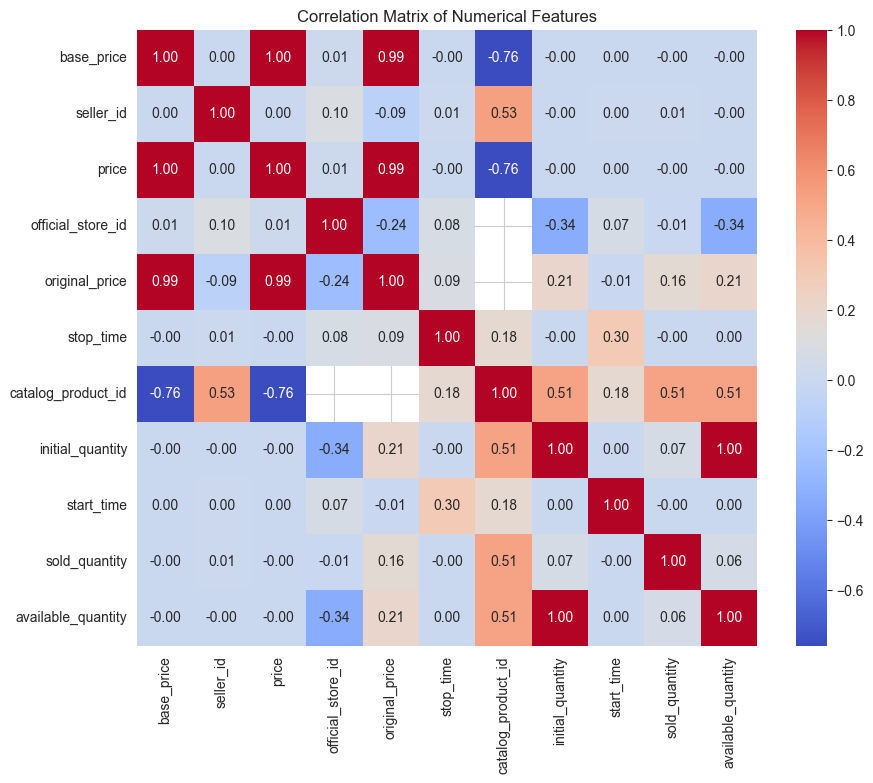

In [130]:
# Compute correlation matrix for numerical features
corr_matrix = X_train_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:**
- ***Linear correlation:***
    - best_price/price/original_price
    - initial_quantity/available_quantity
- ***Positive correlation:***
    1. catalog_product_id/seller_id
    1. catalog_product_id/initial_quantity/sold_quantity/available_quantity
    1. start_time/stop_time
    1. original_price/initial_quantity/available_quantity/sold_quantity
    1. start_time/catalog_product_id
- ***Negative correlation:***
    1. catalog_product_id/price/base_price
    1. official_store_id/initial_quantity/available_quantity
    1. official_store_id/original_price

**Insights:**
- High correlation between different price & quantity variables is expectable.
- Both `catalog_product_id` & `official_store_id` have a strong negative correlation with price & quantity variables. However, these features had a lot of null values, then they won't be useful for inference.



## 1.2 Target variable

In [131]:
# Target variable distribution
y_train_df.describe()

count     90000
unique        2
top         new
freq      48352
dtype: object

In [132]:
X_train_df['condition'].describe()

count     90000
unique        2
top         new
freq      48352
Name: condition, dtype: object

In [133]:
detected = False
for i, row in enumerate(X_train_df['condition']):
    if row == y_train_df.iloc[i]:
        pass
    else:
        print(f"Mismatch at index {i}:", row)
        detected = True
if not detected:
    print("No mismatches detected between 'condition' and target variable.")

No mismatches detected between 'condition' and target variable.


In [134]:
X_test_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

As we verified, the column `condition` is effectively the target value. We will remove it from dataset.

Actually, it should've been removed by the `new_or_used.py` script, but it seems that feature was forgotten for the test split.

The `build_dataset()` function should be fixed to delete it previously.

In [135]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

In [136]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

## 1.3 Visualization

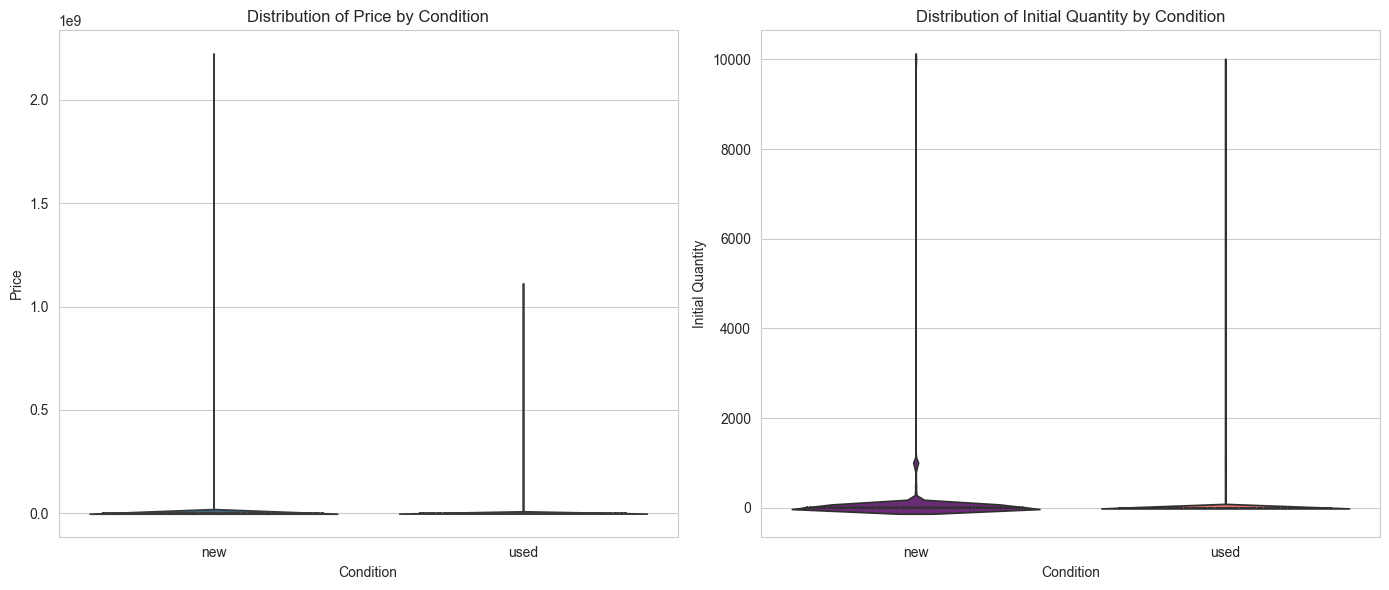

In [145]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot for 'price' ---
plt.subplot(1, 2, 1) # This creates a 1-row, 2-column grid and selects the 1st plot
sns.violinplot(
    x=y_train_df,
    y='price',
    data=X_train_df,
    hue=y_train_df,
    palette='viridis',
    inner='quartile'    # Displays quartiles within the violins for more detail
)
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# --- Plot for 'initial_quantity' ---
plt.subplot(1, 2, 2)
sns.violinplot(
    x=y_train_df,
    y='initial_quantity',
    data=X_train_df,
    hue=y_train_df,
    palette='magma',
    inner='quartile'
)
plt.title('Distribution of Initial Quantity by Condition')
plt.xlabel('Condition')
plt.ylabel('Initial Quantity')

plt.tight_layout()

# Save the plot to a file
#plt.savefig('two_sided_violin_plots.png')

plt.show()

Both features are heavily skewed, with many outliers on the upper side.

What's more, `price` also shows some imbalance between classes.

# 2. Feature Engineering

In [249]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

In [250]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

## Removing empty values

In [223]:
empty_columns = ['differential_pricing', 'subtitle', 'listing_source', 'coverage_areas','international_delivery_mode']
X_train_df[empty_columns].describe()

,differential_pricing,subtitle,listing_source,coverage_areas,international_delivery_mode
count,0,0,90000,90000,90000
unique,0,0,1,1,1
top,NaN,NaN,,[],none
freq,NaN,NaN,90000,90000,90000


In [251]:
# Remove empty columns
X_train_df.drop(columns=empty_columns, inplace=True)
y_train_df.drop(columns=empty_columns, inplace=True)

# Apply the same transformation to the test set
X_test_df.drop(columns=empty_columns, inplace=True)
y_test_df.drop(columns=empty_columns, inplace=True)

## Missing Values handling
- Nulls: `parent_item_id`, `warranty`
- empty list ('[]'): `sub_status`, `tags`

### Nulls
We have previously detected missing values for `parent_item_id` and `warranty`, but these features won't be taken in consideration, so handling missing values is no needed by now.

### Empty lists
Some features has '[]' values. Let's analyze how to handle it.

In [252]:
X_train_df['sub_status'].astype(str).unique()

array(['[]', "['suspended']", "['expired']", "['deleted']"], dtype=object)

This data could add noise to our model because it realtes to not-active items, so those would be deleted and then `sub_status` column will be also removed.

In [253]:
# Remove items where 'sub_status' contains any data (not active items)
original = len(X_train_df)
mask = X_train_df['sub_status'].astype(str) == '[]'
X_train_df = X_train_df[mask]
y_train_df = y_train_df[mask]
cleaned = len(X_train_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data.")

Removed 891 items (-0.99%) with 'sub_status' data.


In [254]:
# Apply the same transformation to the test set
original = len(X_test_df)
mask = X_test_df['sub_status'].astype(str) == '[]'
X_test_df = X_test_df[mask]
y_test_df = y_test_df[mask]
cleaned = len(X_test_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data (test split).")

Removed 95 items (-0.95%) with 'sub_status' data (test split).


In [255]:
# Double check if values were removed correctly
X_train_df['sub_status'].astype(str).unique()

array(['[]'], dtype=object)

In [256]:
# 'sub_status' is no longer needed, so we can drop it
X_train_df.drop(columns=['sub_status'], inplace=True)
X_test_df.drop(columns=['sub_status'], inplace=True)

X_train_df.reset_index(drop=True, inplace=True)
X_test_df.reset_index(drop=True, inplace=True)

## Outliers handling

In [ ]:
def remove_outliers_iqr(data: list[pd.DataFrame], column: str, iqr_factor: float = 1.5) -> list[pd.DataFrame]:
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to remove outliers from.
        iqr_factor (float): The multiplier for the IQR to define outlier bounds (default is 1.5).

    Returns:
        list[pd.DataFrame]: A list with new DataFrames for every split with outliers removed from the specified column.
    """
    df_train = data[0]
    df_test = data[1]

    if column not in df_train.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Filter out the outliers
    df_train_cleaned = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]
    df_test_cleaned = df_test[(df_test[column] >= lower_bound) & (df_test[column] <= upper_bound)]

    print(f"Outliers removed from '{column}' using IQR method (factor: {iqr_factor}):")
    print("\nTRAIN SPLIT:")
    print(f"  Original rows: {len(df_train)}")
    print(f"  Rows after outlier removal: {len(df_train_cleaned)}")
    print(f"  Outliers removed: {len(df_train) - len(df_train_cleaned)}")

    print("\nTEST SPLIT:")
    print(f"  Original rows: {len(df_test)}")
    print(f"  Rows after outlier removal: {len(df_test_cleaned)}")
    print(f"  Outliers removed: {len(df_test) - len(df_test_cleaned)}")

    return [df_train_cleaned, df_test_cleaned]

In [261]:
continuous_features = ['price', 'initial_quantity']

# Initialize the DataFrame that will store the cumulatively filtered data.
X_train_outlier_df = X_train_df.copy()
X_test_outlier_df = X_test_df.copy()

for feature in continuous_features:
    X_train_outlier_df, X_test_outlier_df = remove_outliers_iqr([X_train_outlier_df,X_test_outlier_df], feature, iqr_factor=1.5)
    print('\n')

Outliers removed from 'price' using IQR method (factor: 1.5):

TRAIN SPLIT:
  Original rows: 89109
  Rows after outlier removal: 76108
  Outliers removed: 13001

TEST SPLIT:
  Original rows: 9905
  Rows after outlier removal: 8369
  Outliers removed: 1536


Outliers removed from 'initial_quantity' using IQR method (factor: 1.5):

TRAIN SPLIT:
  Original rows: 76108
  Rows after outlier removal: 64161
  Outliers removed: 11947

TEST SPLIT:
  Original rows: 8369
  Rows after outlier removal: 7019
  Outliers removed: 1350




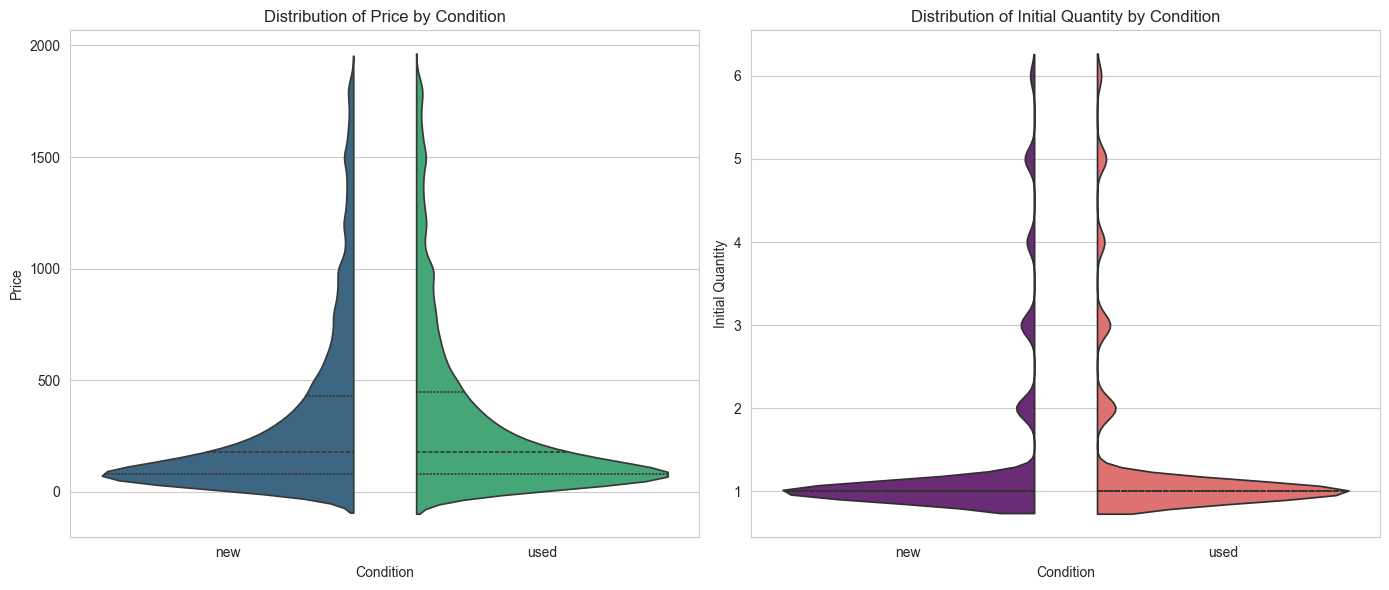

In [263]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# --- Plot for 'price' ---
plt.subplot(1, 2, 1)
sns.violinplot(
    x=y_train_df, 
    y='price',
    hue=y_train_df,
    data=X_train_outlier_df,
    palette='viridis',
    inner='quart',   # Changed from 'quartile' to 'quart' for brevity and common usage
    split=True,      # This enables the two-sided effect
    gap=.0001,          # Adds a small gap between the split halves
    legend=False     # Hide redundant legend
)
plt.title('Distribution of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# --- Plot for 'initial_quantity' ---
plt.subplot(1, 2, 2)
sns.violinplot(
    x=y_train_df,
    y='initial_quantity',
    hue=y_train_df,
    data=X_train_outlier_df,
    palette='magma',
    inner='quart',
    split=True,
    gap=.0001,
    legend=False
)
plt.title('Distribution of Initial Quantity by Condition')
plt.xlabel('Condition')
plt.ylabel('Initial Quantity')

# Save the plot to a file
#plt.savefig('split_violin_plots.png')

plt.tight_layout()
plt.show()

- Almost every 'used' item has a quantity equal to 1 (as originally hypothesized).
- At lower values for `price`, there's no significant difference between target categories. For mid to higher values, the possibility of being 'new' increases.

## Normalization
Min-max scaling will be applied to continues values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled_df = X_train_outlier_df.copy().dropna()
X_test_scaled_df = X_test_outlier_df.copy().dropna()

# 1. Initialize the scaler
scaler = MinMaxScaler()

# 2. Fit the scaler to continuous data (learn min and max from training data)
scaler.fit(X_train_df[continuous_features])

# 3. Transform the continuous features
X_train_scaled_df[continuous_features] = scaler.transform(X_train_df[continuous_features])
X_test_scaled_df[continuous_features] = scaler.transform(X_test_df[continuous_features])

print("DataFrame after Min-Max Scaling:")
X_train_scaled_df[['price','initial_quantity']].describe()

DataFrame after Min-Max Scaling:


,price,initial_quantity
count,8.910900e+04,89109.000000
mean,2.626932e-05,0.003386
std,4.110698e-03,0.042288
min,0.000000e+00,0.000000
25%,4.012200e-08,0.000000
50%,1.121220e-07,0.000000
75%,3.596220e-07,0.000100
max,1.000000e+00,1.000000


### Concatenate to original dataframe

In [ ]:
# 1. Identify non-continuous features from the original DataFrame
non_continuous_features = [col for col in X_train_df.columns if col not in continuous_features]

# 2. Select these non-continuous features
df_train_non_continuous = X_train_df[non_continuous_features]
df_test_non_continuous = X_test_df[non_continuous_features]

# 3. Rename columns in X_train_scaled_df to add '_scaled' suffix
X_train_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_train_scaled_df_renamed = X_train_scaled_df.add_suffix('_scaled')

# 4. Apply the same transformation to the test set
X_test_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_test_scaled_df_renamed = X_test_scaled_df.add_suffix('_scaled')

# 5. Concatenate the non-continuous features and the scaled features
X_train_df = pd.concat([df_train_non_continuous, X_train_scaled_df_renamed], axis=1)
X_test_df = pd.concat([df_test_non_continuous, X_test_scaled_df_renamed], axis=1)

## Binary Encoding

In [266]:
X_train_df['currency_id'].value_counts()

currency_id
ARS    88605
USD      504
Name: count, dtype: int64

In [267]:
# Create the new boolean feature 'is_USD'
X_train_df['is_USD'] = (X_train_df['currency_id'] == 'USD').astype('uint8') # as numeric type (1/0)
X_train_df.drop(columns=['currency_id'], inplace=True)

In [268]:
X_train_df['is_USD'].value_counts()

is_USD
0    88605
1      504
Name: count, dtype: int64

In [269]:
# Apply the same transformation to the test set
X_test_df['is_USD'] = (X_test_df['currency_id'] == 'USD').astype('uint8')
X_test_df.drop(columns=['currency_id'], inplace=True)

In [270]:
X_train_df

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,attributes,buying_mode,tags,parent_item_id,category_id,...,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,start_time,permalink,sold_quantity,available_quantity,price_scaled,initial_quantity_scaled,is_USD
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],80.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,MLA126406,...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,3.562200e-08,0.000000,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],2650.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,[],buy_it_now,[],MLA7727150374,MLA10267,...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,1.192122e-06,0.000000,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],60.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,MLA1227,...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,2.662200e-08,0.000000,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],580.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,[],buy_it_now,[],None,MLA86345,...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,2.606220e-07,0.000000,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],30.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,MLA41287,...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,None,NaN,1440454040000,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,1.312200e-08,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89104,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],68.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],9451922715,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA1130924824,MLA1227,...,El Fin De Las Libertades - Benegas Lynch (h) -...,False,2015-10-02T13:36:50.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1448977010000,active,None,NaN,1443793010000,http://articulo.mercadolibre.com.ar/MLA1315520...,0,1,3.022200e-08,0.000000,0
89105,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],126.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4665194056,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA1317691731,MLA45559,...,Honda Wave Guardabarro Interior Trasero,False,2015-09-22T23:30:21.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448148621000,paused,None,NaN,1442964621000,http://articulo.mercadolibre.com.ar/MLA6934

In [271]:
# Convert booleans into integers
for col in ['accepts_mercadopago', 'automatic_relist']:
    X_train_df[col] = X_train_df[col].dropna().astype('uint8')
    X_test_df[col] = X_test_df[col].dropna().astype('uint8')

## One-hot encoding
**(Categorical features)**

In [272]:
X_train_df['listing_type_id'].value_counts()

listing_type_id
bronze          56182
free            19139
silver           8154
gold_special     2690
gold             2166
gold_premium      765
gold_pro           13
Name: count, dtype: int64

Since these categories (bronze, free, etc.) don't have an inherent ordinal relationship (e.g., 'gold' isn't necessarily "greater" than 'silver' in a numerical sense that a model would understand without context, even if they represent tiers), one-hot encoding is a suitable choice.

In [273]:
X_train_df['buying_mode'].value_counts()

buying_mode
buy_it_now    86439
classified     1979
auction         691
Name: count, dtype: int64

In [274]:
X_train_df['status'].value_counts()

status
active            86116
paused             2992
not_yet_active        1
Name: count, dtype: int64

In [275]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to encode
categorical_features = ['listing_type_id', 'buying_mode', 'status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Fit and transform the selected categorical columns
encoded_train_data = encoder.fit_transform(X_train_df[categorical_features])

# Create a DataFrame with the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
ecoded_features = pd.DataFrame(encoded_train_data, columns=encoded_feature_names)

# Apply the same transformation to the test set
encoded_test_data = encoder.transform(X_test_df[categorical_features])
encoded_features_test = pd.DataFrame(encoded_test_data, columns=encoded_feature_names)

# Concatenate with the original DataFrame (dropping the original categorical columns)
X_train_transformed_df = pd.concat([X_train_df.drop(columns=categorical_features), ecoded_features], axis=1)
X_test_transformed_df = pd.concat([X_test_df.drop(columns=categorical_features), encoded_features_test], axis=1)

In [276]:
X_train_transformed_df.sample(5)  # Display a sample of the transformed training data

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,attributes,tags,parent_item_id,category_id,descriptions,last_updated,...,sold_quantity,available_quantity,price_scaled,initial_quantity_scaled,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_buy_it_now,buying_mode_classified,status_not_yet_active,status_paused
77360,"{'country': {'name': 'Argentina', 'id': 'AR'},...",PODES REVISAR EL ARTICULO ANTES DE ABONAR. CHE...,[],30.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",6884045011,[],MLA,[],[dragged_bids_and_visits],MLA7885459665,MLA15334,[{'id': 'MLA6731897115-935790063'}],2015-10-02T18:26:36.000Z,...,0,1,1.312200e-08,0.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57621,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],45.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",6538753635,[],MLA,[],[dragged_bids_and_visits],MLA3033268892,MLA41118,[{'id': 'MLA9106312814-944719811'}],2015-10-15T00:37:20.000Z,...,0,1,1.987200e-08,0.0000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38209,"{'country': {'name': 'Argentina', 'id': 'AR'},...",3 meses de garantia,[],394.79,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2015548469,[],MLA,[],[dragged_bids_and_visits],MLA6814097366,MLA373126,[{'id': 'MLA2348349946-906653883'}],2015-10-01T20:26:12.000Z,...,0,10,1.772775e-07,0.0009,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24098,"{'country': {'name': 'Argentina', 'id': 'AR'},...",100% Garantizado,[],119.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",3402193681,[],MLA,[],[dragged_bids_and_visits],MLA8437701238,MLA72661,[{'id': 'MLA5044847029-941786477'}],2015-10-10T17:06:15.000Z,...,0,2,5.317200e-08,0.0001,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48858,"{'country': {'name': 'Argentina', 'id': 'AR'},...","Si,por defecto de fabrica.",[],500.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],2439822710,[],MLA,[],[dragged_bids_and_visits],MLA1026264161,MLA1884,[{'id': 'MLA1942293150-937998840'}],2015-10-05T20:38:42.000Z,...,2,2,2.246220e-07,0.0001,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Final result

In [277]:
before_len = len(X_train_df.columns)
after_len = len(X_train_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 45
Increase of 7 features (18.42%)


In [278]:
before_len = len(X_test_df.columns)
after_len = len(X_test_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 45
Increase of 7 features (18.42%)


# 3. Feature Selection

In [285]:
# Store all features in a list
features = X_train_transformed_df.columns.tolist()

During missing values analysis it was noticed that these variables were problematic:
`site_id`,`video_id`, `official_store_id`, `original_price`, `catalog_product_id`,`deal_ids`

In [286]:
# As it was stated before, ID variables will be ignored during feature selection.
# Also, time-related and tags variables won't be used.
id_variables = ['id', 'parent_item_id', 'official_store_id', 'category_id', 'site_id', 'video_id', 'catalog_product_id', 'deal_ids', 'seller_id', 'descriptions']
time_variables = ['start_time', 'stop_time', 'date_created', 'last_updated']
tag_variables = ['tags', 'variations', 'shipping', 'attributes', 'non_mercado_pago_payment_methods']
post_related_variables = ['title', 'permalink', 'secure_thumbnail', 'thumbnail', 'pictures'] 

In [287]:
# Remove specific features that are not needed for the analysis
[features.remove(x) for x in (id_variables + time_variables + tag_variables + post_related_variables)]

# Remove other specific features that are not relevant for the analysis
other_features = ['original_price', 'base_price', 'warranty', 'seller_address', 'sold_quantity', 'available_quantity']
[features.remove(x) for x in other_features]

# Show the selected features
print(f"Selected features ({len(features)}):")
str(features)

Selected features (15):


"['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'initial_quantity_scaled', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused']"

**Criteria:**
* **Highly correlated features:**
    * **Quantity:** Only `initial_quantity` will be used. The hypothesis is that it could serve to differentiate brand-new items because usually there are more than one available.
    * **Price:** Only `price` will be used.
* **Unrelated features:**
    * Seller address is not relevant for our target.
    * Warranty has a lot of missing values, and there is a lot of diversity of arbitrary values; it's difficult to extract useful information from this feature.
    * Post-related features.

In [288]:
X_train_transformed_df[features].columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'listing_type_id_free',
       'listing_type_id_gold', 'listing_type_id_gold_premium',
       'listing_type_id_gold_pro', 'listing_type_id_gold_special',
       'listing_type_id_silver', 'buying_mode_buy_it_now',
       'buying_mode_classified', 'status_not_yet_active', 'status_paused'],
      dtype='object')

### Dtype Optimization
Every variable will be transformed to its optimal size based on its content, minimizing storage, processing, and training.

In [289]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  uint8  
 1   automatic_relist              89109 non-null  uint8  
 2   price_scaled                  89109 non-null  float64
 3   initial_quantity_scaled       89109 non-null  float64
 4   is_USD                        89109 non-null  uint8  
 5   listing_type_id_free          89109 non-null  float64
 6   listing_type_id_gold          89109 non-null  float64
 7   listing_type_id_gold_premium  89109 non-null  float64
 8   listing_type_id_gold_pro      89109 non-null  float64
 9   listing_type_id_gold_special  89109 non-null  float64
 10  listing_type_id_silver        89109 non-null  float64
 11  buying_mode_buy_it_now        89109 non-null  float64
 12  buying_mode_classified        89109 non-null  float64
 13  s

In [290]:
df = X_train_transformed_df[features].copy()

# Select only numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

min_max_values = pd.DataFrame(columns=['Min_Value', 'Max_Value'])

for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    min_max_values.loc[col] = [min_val, max_val]

print(min_max_values)

                              Min_Value  Max_Value
accepts_mercadopago                 0.0        1.0
automatic_relist                    0.0        1.0
price_scaled                        0.0        1.0
initial_quantity_scaled             0.0        1.0
is_USD                              0.0        1.0
listing_type_id_free                0.0        1.0
listing_type_id_gold                0.0        1.0
listing_type_id_gold_premium        0.0        1.0
listing_type_id_gold_pro            0.0        1.0
listing_type_id_gold_special        0.0        1.0
listing_type_id_silver              0.0        1.0
buying_mode_buy_it_now              0.0        1.0
buying_mode_classified              0.0        1.0
status_not_yet_active               0.0        1.0
status_paused                       0.0        1.0


All are unsigned integers:
- For bool-type lower variable will be used (uint8).
- For `initial_quantity` 'int32' will be enough.
- For `price` 'int64' will be needed.

In [291]:
X_train_transformed_df.isnull().sum()

seller_address                0
warranty                  54219
deal_ids                      0
base_price                    0
shipping                      0
                          ...  
listing_type_id_silver        0
buying_mode_buy_it_now        0
buying_mode_classified        0
status_not_yet_active         0
status_paused                 0
Length: 45, dtype: int64

In [292]:
bool_features = features
bool_features.remove('price_scaled')
bool_features.remove('initial_quantity_scaled')

In [293]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  uint8  
 1   automatic_relist              89109 non-null  uint8  
 2   is_USD                        89109 non-null  uint8  
 3   listing_type_id_free          89109 non-null  float64
 4   listing_type_id_gold          89109 non-null  float64
 5   listing_type_id_gold_premium  89109 non-null  float64
 6   listing_type_id_gold_pro      89109 non-null  float64
 7   listing_type_id_gold_special  89109 non-null  float64
 8   listing_type_id_silver        89109 non-null  float64
 9   buying_mode_buy_it_now        89109 non-null  float64
 10  buying_mode_classified        89109 non-null  float64
 11  status_not_yet_active         89109 non-null  float64
 12  status_paused                 89109 non-null  float64
dtypes

In [294]:
optimized_df = X_train_transformed_df[features].copy()

for col in optimized_df.columns:
        optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='integer')

In [295]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89109 entries, 0 to 89108
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   accepts_mercadopago           89109 non-null  int8 
 1   automatic_relist              89109 non-null  int8 
 2   is_USD                        89109 non-null  int8 
 3   listing_type_id_free          89109 non-null  int8 
 4   listing_type_id_gold          89109 non-null  int8 
 5   listing_type_id_gold_premium  89109 non-null  int8 
 6   listing_type_id_gold_pro      89109 non-null  int8 
 7   listing_type_id_gold_special  89109 non-null  int8 
 8   listing_type_id_silver        89109 non-null  int8 
 9   buying_mode_buy_it_now        89109 non-null  int8 
 10  buying_mode_classified        89109 non-null  int8 
 11  status_not_yet_active         89109 non-null  int8 
 12  status_paused                 89109 non-null  int8 
dtypes: int8(13)
memory usage: 1.1 M

In [296]:
X_train_transformed_df[features].describe()

,accepts_mercadopago,automatic_relist,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,buying_mode_buy_it_now,buying_mode_classified,status_not_yet_active,status_paused
count,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000,89109.000000
mean,0.977791,0.047212,0.005656,0.214782,0.024307,0.008585,0.000146,0.030188,0.091506,0.970037,0.022209,0.000011,0.033577
std,0.147363,0.212093,0.074994,0.410673,0.154002,0.092257,0.012078,0.171105,0.288329,0.170487,0.147363,0.003350,0.180138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Predictive capabilities

### Predictiveness

In [371]:
features

['accepts_mercadopago',
 'automatic_relist',
 'is_USD',
 'listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver',
 'buying_mode_buy_it_now',
 'buying_mode_classified',
 'status_not_yet_active',
 'status_paused']

In [297]:
# Get the numerical columns
numerical_features = X_train_transformed_df[features].select_dtypes(include=['number','bool']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['accepts_mercadopago', 'automatic_relist', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'buying_mode_buy_it_now', 'buying_mode_classified', 'status_not_yet_active', 'status_paused']


In [ ]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_transformed_df[numerical_features].copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


automatic_relist                0.187453
listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
accepts_mercadopago             0.092842
status_paused                   0.067348
listing_type_id_gold_pro        0.011214
status_not_yet_active           0.003110
listing_type_id_gold_premium    0.001252
is_USD                         -0.025116
buying_mode_classified         -0.092842
listing_type_id_free           -0.485303
Name: target_encoded, dtype: float64

`status` is not adding any predictive value. It's mostly unbalanced ('active' value) and doesn't add relevant information.

In [299]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


listing_type_id_free            0.485303
automatic_relist                0.187453
listing_type_id_silver          0.168811
listing_type_id_gold_special    0.156955
listing_type_id_gold            0.102546
buying_mode_buy_it_now          0.099804
accepts_mercadopago             0.092842
buying_mode_classified          0.092842
status_paused                   0.067348
is_USD                          0.025116
listing_type_id_gold_pro        0.011214
status_not_yet_active           0.003110
listing_type_id_gold_premium    0.001252
Name: target_encoded, dtype: float64

In [303]:
print(f"Best predictor for 'new' items is '{predictiveness.idxmax()}', while worst is '{predictiveness.idxmin()}'")

Best predictor for 'new' items is 'listing_type_id_free', while worst is 'listing_type_id_gold_premium'


It's evident that there's a clear correlation between 'free' seller-users (who mostly sell used items) and paying sellers (actual businesses offering new items). Interestingly, the **'gold_premium' tier is not a good predictor.**

In [304]:
df_corr.drop(columns=['target'], inplace=True)  # Ensure 'target_encoded' is not in df_corr before adding it

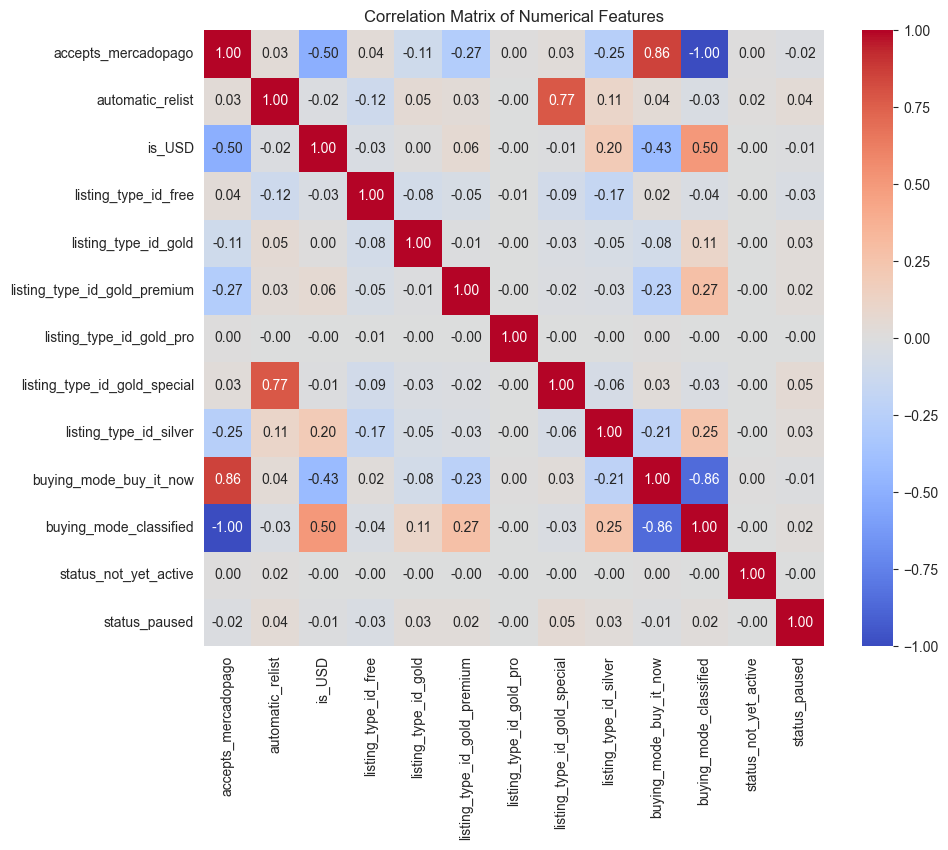

In [334]:
# Compute correlation matrix for numerical features
corr_matrix = df_corr[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

---
---
# Model Design *(productive cycle)*

# 2º iteration

## Grouping dummies 'listing_type_id’

In [369]:
# Find dummy variables for feature
[feature for feature in features if feature.startswith('listing_type_id')]

['listing_type_id_free',
 'listing_type_id_gold',
 'listing_type_id_gold_premium',
 'listing_type_id_gold_pro',
 'listing_type_id_gold_special',
 'listing_type_id_silver']

In [368]:
num_paid_users = X_train_df['listing_type_id'].value_counts().tolist()
num_paid_users.pop(1)
print(f"Remacably, {sum(num_paid_users)/len(X_train_df):.1%} are paid users.")

Remacably, 78.5% are paid users.


In [359]:
X_train_transformed_df['free_tier'] = X_train_transformed_df['listing_type_id_free'] == True

---
# 3º iteration

## Synthetic features

### Datetime -> is_weekend & is_working_hours

In [ ]:
X_train_df['date_created'].sample()

40638    2015-09-25T02:50:38.000Z
Name: date_created, dtype: object

In [ ]:
test_df = X_train_df.copy()

# Convert 'date_created' to datetime objects
# The 'T' and 'Z' indicate time and UTC timezone, respectively,
# which pandas handles automatically with 'infer_datetime_format=True'
test_df['date_created_dt'] = pd.to_datetime(test_df['date_created'], infer_datetime_format=True)

# Create the 'time_created' feature (hour of the day)
test_df['time_created'] = test_df['date_created_dt'].dt.hour

# Create the 'day_of_week' feature (0=Monday, 6=Sunday)
test_df['day_of_week'] = test_df['date_created_dt'].dt.dayofweek

# Drop the original 'date_created' (str) and intermediate datetime column
test_df = test_df.drop(columns=['date_created', 'date_created_dt'])

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_56519/3749293262.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  test_df['date_created_dt'] = pd.to_datetime(test_df['date_created'], infer_datetime_format=True)


In [ ]:
test_df[['time_created','day_of_week']].sample(5)  # Display a sample of the transformed test data

,time_created,day_of_week
62946,18,5
21946,19,0
69799,0,3
9264,13,2
44252,0,3


In [ ]:
# 1. Create 'is_weekend' feature
# Days of the week are 0=Monday, 1=Tuesday, ..., 4=Friday, 5=Saturday, 6=Sunday
# So, Saturday (5) and Sunday (6) are weekends.
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

# 2. Create 'is_working_hours' feature
# Working hours are between 6 AM (inclusive) and 8 PM (inclusive)
# This means hours 6, 7, ..., 20.
test_df['is_working_hours'] = (
    (test_df['time_created'] >= 6) &
    (test_df['time_created'] <= 20)
).astype(int)

In [ ]:
idx = test_df.sample(5).index
print(y_train_df.iloc[idx])
test_df[['time_created','is_working_hours','day_of_week','is_weekend']].iloc[idx] 


61163     new
80411    used
52467     new
5415     used
85131     new
dtype: object


,time_created,is_working_hours,day_of_week,is_weekend
60567,20,1,2,0
79618,13,1,1,0
51962,20,1,2,0
5359,14,1,4,0
84289,22,0,0,0


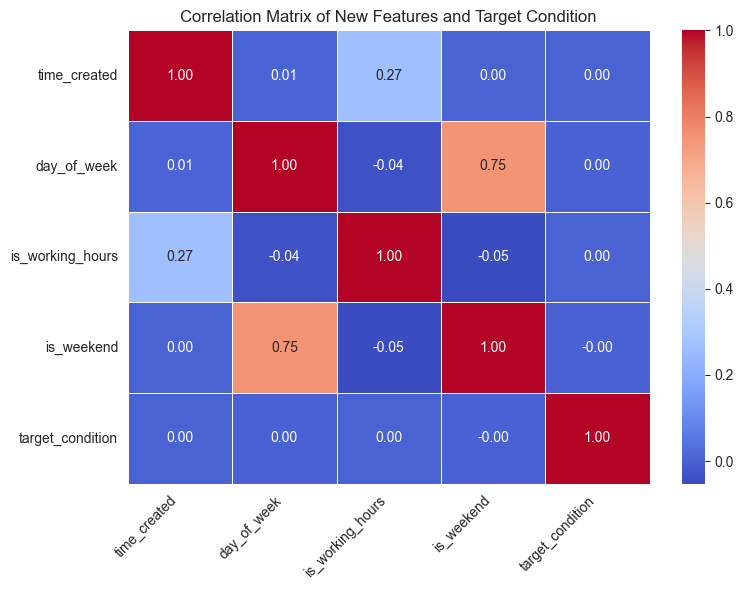

Correlation with 'target_condition' (where 'new'=0, 'used'=1):
target_condition    1.000000
is_working_hours    0.003129
time_created        0.000969
day_of_week         0.000202
is_weekend         -0.001865
Name: target_condition, dtype: float64


In [ ]:
# Understanding correlation with the target variable

target_numerical = y_train_df.map({'new': 1, 'used': 0})
correlation_df = test_df[['time_created', 'day_of_week', 'is_working_hours', 'is_weekend']].copy()
correlation_df['target_is_new'] = target_numerical
correlation_matrix = correlation_df.corr()

# Graph
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of New Features and Target Condition')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('new_features_correlation_heatmap.png')
plt.show()

print("Correlation with 'target_condition' (where 'new'=1, 'used'=0):")
print(correlation_matrix['target_condition'].sort_values(ascending=False))

While the correlation matrix might suggest that 'used' items tend to be posted more during weekends and non-working hours, this observation lacks statistical significance.

Sadly, day or time do not appear to have a significant correlation with `target_condition`, rendering them less useful targets.